In [104]:
import math    # sqrt
import imageio # imread, imwrite

## `im_split`
Takes an image `im` and optionally a parameter `blocks` to determine how many blocks it should be split into. `blocks` must be a square number greater than 1. Overlap determines the percentage overlap between the blocks. This parameter does not work as intended yet.

In [97]:
def im_split(im, overlap=0.2, blocks=4):
    assert(blocks > 1)
    assert(math.sqrt(blocks).is_integer())
    assert(overlap >= 0 and overlap < 1)
    
    rows = int(math.sqrt(blocks))
    width = im.shape[0]
    height = im.shape[1]
    
    offset_w = (width * overlap)
    output_w = (width / rows) + offset_w
    
    offset_h = (height * overlap)
    output_h = (height / rows) + offset_h
    
    output_images = []
    
    for r in range(rows):
        r_start = int(max(output_w * r - offset_w * (r+1), 0))
        r_end   = int(min(output_w * (r+1), height))
        for c in range(rows):
            c_start = int(max(output_h * c - offset_h * (c+1), 0))
            c_end   = int(min(output_h * (c+1), width))
            print("%d:%d , %d:%d" % (r_start, r_end, c_start, c_end))
            output_images.append(im[r_start:r_end,c_start:c_end])
    
    return output_images

## Test

In [106]:
im1 = imageio.imread('../data/S2_Img_003.00.tif')

# split parameters, used later for plotting
blocks = 4
overlap = 0.2
ims = im_split(im1, blocks=blocks, overlap=overlap)
len(ims)

0:2867 , 0:2867
0:2867 , 1228:4096
1228:4096 , 0:2867
1228:4096 , 1228:4096


4

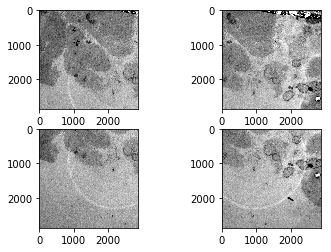

In [107]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
rows = int(math.sqrt(blocks))
for i in range(1, len(ims)+1):
    fig.add_subplot(rows, rows, i)
    plt.imshow(ims[i-1], cmap=plt.cm.gray)
plt.show()